In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import cifar10
from sklearn.preprocessing import OneHotEncoder

In [2]:
(x_train , y_train) , (x_test,y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 3s 0us/step


In [3]:
cifar_10_classes = [
    "Airplane",
    "Automobile",
    "Bird",
    "Cat",
    "Deer",
    "Dog",
    "Frog",
    "Horse",
    "Ship",
    "Truck"
]

In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
y_train[1][0]

9

(-0.5, 31.5, 31.5, -0.5)

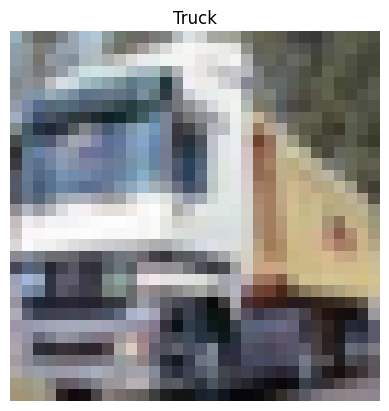

In [6]:
import matplotlib.pyplot as plt
plt.imshow(x_train[1])
plt.title(cifar_10_classes[y_train[1][0]])
plt.axis("off")

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
one_hot_encoder  = OneHotEncoder()
y_train = one_hot_encoder.fit_transform(y_train).toarray()
y_test = one_hot_encoder.fit_transform(y_test).toarray()

In [9]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(32, 32, 3)),
  tf.keras.layers.Dense(10, activation="softmax")
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))



Epoch 1/20
782/782 [==============================] - 9s 10ms/step - loss: 1.9313 - accuracy: 0.3189 - val_loss: 1.8721 - val_accuracy: 0.3385
Epoch 2/20
782/782 [==============================] - 5s 6ms/step - loss: 1.8441 - accuracy: 0.3565 - val_loss: 1.8566 - val_accuracy: 0.3561
Epoch 3/20
782/782 [==============================] - 2s 3ms/step - loss: 1.8200 - accuracy: 0.3678 - val_loss: 1.9112 - val_accuracy: 0.3459
Epoch 4/20
782/782 [==============================] - 3s 4ms/step - loss: 1.8041 - accuracy: 0.3766 - val_loss: 1.7810 - val_accuracy: 0.3790
Epoch 5/20
782/782 [==============================] - 3s 4ms/step - loss: 1.7839 - accuracy: 0.3827 - val_loss: 1.9679 - val_accuracy: 0.3434
Epoch 6/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7855 - accuracy: 0.3838 - val_loss: 1.7631 - val_accuracy: 0.3854
Epoch 7/20
782/782 [==============================] - 2s 3ms/step - loss: 1.7696 - accuracy: 0.3882 - val_loss: 1.7984 - val_accuracy: 0.3652
Epoch

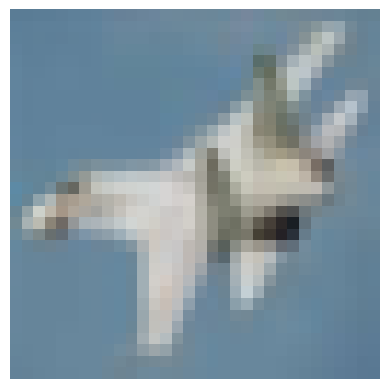

In [10]:
new_image = x_test[10]
plt.imshow(new_image)
plt.axis("off")
img = np.expand_dims(new_image, axis=0)

In [11]:
img.shape

(1, 32, 32, 3)

In [12]:
pred = model.predict(img)
pred

1/1 [==============================] - 0s 112ms/step


array([[0.31223142, 0.02399713, 0.03411235, 0.07986869, 0.01834623,
        0.06256324, 0.00558525, 0.00682984, 0.445004  , 0.01146188]],
      dtype=float32)

In [13]:
prediction = np.argmax(pred)
cifar_10_classes[prediction]

'Ship'